# Residential Sector

## Overview

The Residential sector in SATIM is structured to capture changes in fuel and technology use and energy service demands that follow rising income levels. There are three income groups represented in SATIM:
- **Low income**: Represents 45% of the population in 2017
- **Middle income**: 31% of the population
- **High income**: 24% of the population

**Table 8.1: Average annual income per income group in the residential sector.**
| Household Income Group | Average Income (R)    |
|------------------------|-----------------------|
| Low Income             | 0 - 19,200            |
| Middle Income          | 19,201 - 76,800       |
| High Income            | 76,801 -              |



<Figure size 1000x600 with 0 Axes>

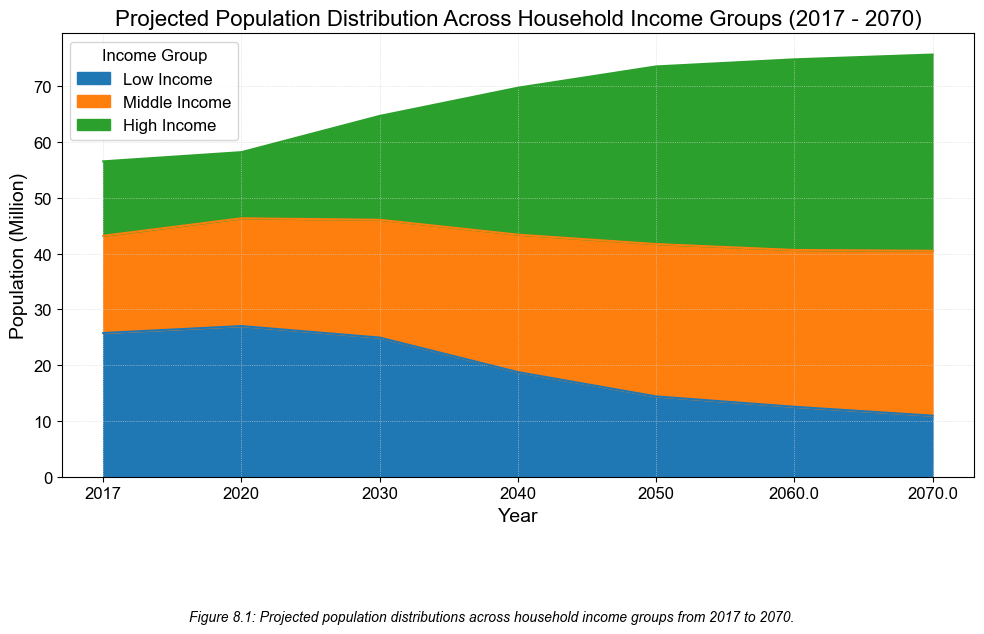

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# URL of the Excel file in the GitHub repository
file_url = 'https://github.com/SavanhaJadedk/Satim-test-book-1.1/raw/main/docs/Excel%20workbooks/Scen_DMD_PRJ.xlsx'

# Download the file
response = requests.get(file_url)
response.raise_for_status()  # Ensure the request was successful

# Read the Excel file into a pandas DataFrame
with BytesIO(response.content) as file:
    df = pd.read_excel(file, sheet_name='RES', header=None)

# Extract years (row 21, columns E to K which corresponds to index 20, columns 4 to 10 in 0-indexed pandas)
years = df.iloc[20, 4:11].values

# Extract income groups (rows 22-24, column C which corresponds to index 21-23, column 2 in 0-indexed pandas)
income_groups = df.iloc[21:24, 2].values

# Extract corresponding population per income group for each year (rows 22-24, columns E to K which corresponds to index 21-23, columns 4 to 10 in 0-indexed pandas)
population_data = df.iloc[21:24, 4:11].values

# Create a DataFrame for plotting
data = pd.DataFrame(population_data.T, columns=income_groups, index=years)

# Plot the area plot with professional formatting
plt.figure(figsize=(10, 6))

# Plot the area plot
data.plot(kind='area', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Set title and labels with larger font size
plt.title('Projected Population Distribution Across Household Income Groups (2017 - 2070)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (Million)', fontsize=14)

# Set legend with larger font size
plt.legend(title='Income Group', fontsize=12)

# Set grid lines with a light gray color
plt.grid(True, linestyle=':', linewidth=0.5, color='lightgray')

# Change font
plt.rcParams.update({'font.family': 'Arial', 'font.size': 12})

# Add caption
caption = 'Figure 8.1: Projected population distributions across household income groups from 2017 to 2070.'
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10, style='italic')

# Adjust layout to make room for the caption
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


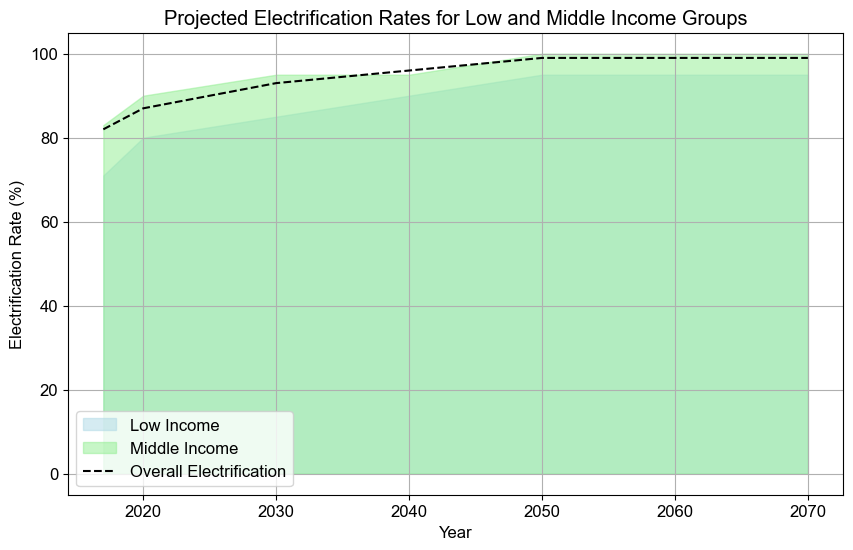

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Year': [2017, 2020, 2030, 2040, 2050, 2060, 2070],
    'Low Income': [71, 80, 85, 90, 95, 95, 95],
    'Middle Income': [83, 90, 95, 95, 100, 100, 100],
    'Overall Electrification': [82, 87, 93, 96, 99, 99, 99]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Plot area chart for low and middle income with dotted line overlay for overall electrification
plt.figure(figsize=(10, 6))

# Plot area chart for low income
plt.fill_between(df.index, df['Low Income'], color='lightblue', alpha=0.5, label='Low Income')
# Plot area chart for middle income
plt.fill_between(df.index, df['Middle Income'], color='lightgreen', alpha=0.5, label='Middle Income')
# Plot dotted line overlay for overall electrification
plt.plot(df.index, df['Overall Electrification'], linestyle='--', color='black', label='Overall Electrification')

# Set labels and title
plt.title('Projected Electrification Rates for Low and Middle Income Groups')
plt.xlabel('Year')
plt.ylabel('Electrification Rate (%)')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()



## Energy Service Demands

Each income group is further disaggregated into a demand for energy services capturing energy consumption for lighting, cooking, space heating, refrigeration, and a combination of other (mostly electrical) appliances, as shown in Table 8.2 (which also shows the drivers of household growth, energy service demands, fuel use, and appliance ownership captured in the model). Each service demand is also characterized by a particular seasonal/diurnal profile.

*(include profiles if possible)*

## Data Sources and Assumptions

The classification of households into income groups and the primary fuel used by households for cooking, space heating, and water heating draws primarily on the 2011 Census (StatsSA, 2011), while electrification assumptions are according to the National Development Plan (National Planning Commission, 2012). Households in all income groups use a variety of fuels to meet their energy service needs and, particularly in middle- and low-income households, typically use more than one fuel type to meet energy services (e.g., both biomass and electricity for cooking) – a principle known as fuel stacking.

Lower income groups have more prominent use of liquid (paraffin) and solid fuels (coal and wood) and lower demand for energy services supplied by electricity due to lower appliance ownership levels. The fuel stacking and lower energy service demands of the low- and middle-income households in the model reflect the difficulties that these households face in terms of both access to and the affordability of using electricity to supply energy services. The energy sources, and quantity, supplying each end use in 2017 is shown in Figure 8.1. This is illustrated in further detail in Appendix A and Figures A1 to A3.

## Modelling Structure

**Table 8.2: Modelling structure and disaggregation for the residential sector in SATIM**

| Parameter | Disaggregation level | Drivers |
| -------------------- | -------------------- | ------- |
| Households | Low, Middle, and High income groups | Population, household size, GDP |
| Energy Service Demands | Lighting, cooking, water heating, space heating and cooling, refrigeration, other | Household income, electrification, policies and regulations such as building standards, behavior change |
| Fuels and appliances |  Wood, coal, paraffin, gas, electricity (televisions, washing machines, dishwashers, etc.) | Household income, electrification, policies and regulations such as fuel subsidies, appliance standards |



*(insert Figure 8.x)*

**Figure 8.x: Final energy demand for the residential sector by household income group, energy end-use, and fuel for the SATIM base year of 2017.**

## Technologies and Efficiencies

Within SATIM, household energy service needs, such as lighting and cooking, are met by technologies such as LEDs or CFLs (subject to 2024 regulations on minimum luminous efficacy) and electric or paraffin stoves. Technologies, and their assumed average efficiencies, are specific to the type of technology and fuel being used. For example, an electric geyser can be used to supply hot water at 75% efficiency, whereas wood used for water heating in low-income households (open fire) has an efficiency of 11%. This allows us to capture the average energy efficiency of meeting energy service needs using different fuels and technologies as well as the impact that a shift in fuel or technology use will have on the demand for energy to supply energy services.

Technology efficiencies can be specific to income groups, e.g., lower-income households are more likely to have old and less efficient fridges. Efficiency levels also capture shifts between electrical appliances, for example, the increased penetration of LEDs for lighting, or the uptake of combined-heat-and-power (CHP) and solar water heaters (SWH) for water heating. The upward mobility of households from lower to middle- and higher-income groups, driven by growth in GDP, will cause an increase in electricity use in favor of other alternative fuels over time, as households increase their appliance ownership as their income grows. Increases in electricity use are however partially tempered by energy efficiency improvements in the sector, based on assumptions about the efficacy of the Standards and Labelling programme and Minimum Energy Performance Standards (MEPS) for appliances (DMRE, 2022).

## Household Mobility

Upward mobility of households is captured in the model by altering the share of households in each income group over time. The share of households in each income group is taken from SAGE. However, under current projections, not all households would be able to migrate out of the lower income group by 2050. Many of these households are currently in a state of energy poverty and may struggle to move away from the use of solid fuels without support.

## Residential Demand Illustrated

Figures 8.3, 8.4, and 8.5 show SANKEY diagrams of residential consumption of fuels to provide energy services in the three income groups in 2023. The SANKEYs give an indicative indication of the energy used by households in each income group, the energy used to supply energy services, as well as the efficiency at which energy services are met in each income group. For example, it shows that low-income households use biomass primarily for cooking and that the efficiency of cooking is low. In addition to biomass, low-income households are also using electricity, coal, and a small amount of paraffin to cook. Energy service demands are represented in terms of useful energy and are therefore not directly comparable across energy services but are comparable across income groups.